<a href="https://colab.research.google.com/github/NithishaRaghavaraju/Garbage-Classifier-ml-code/blob/main/Qunatization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pickle

In [ ]:
# load model from pickle file
model_pkl_file = "garbage_classifier_model.pkl"
with open(model_pkl_file, 'rb') as file:
    model = pickle.load(file)

In [ ]:
model.save("./saved_model")

In [ ]:
from keras.models import load_model
model_final = load_model('./saved_model')

In [ ]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_saved_model("./saved_model")

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

In [ ]:
!pip install tflite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.6/123.6 kB 2.7 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
def quantize_model(model):
    # Convert the model to a quantized version
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    quantized_model = converter.convert()

    return quantized_model

In [ ]:
quantized_model = quantize_model(model)

In [ ]:
with open('quantized_model.tflite', 'wb') as f:
    f.write(quantized_model)

In [ ]:
from PIL import Image

# Open the image file
image = Image.open('/content/plastic4.jpg')

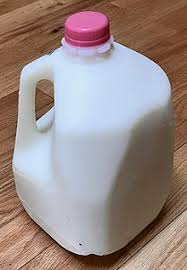

In [ ]:
image

In [ ]:
def resize_image(input_image, target_size=(128, 128)):
    """Resize a PIL Image to the target size."""
    return input_image.resize(target_size)
resized_image=resize_image(image)

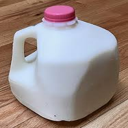

In [ ]:
resized_image

In [ ]:
import numpy as np
a = np.array(image)

In [ ]:
np.array(image)

array([[[152, 115,  86],
        [151, 114,  85],
        [148, 111,  82],
        ...,
        [130,  93,  66],
        [130,  93,  66],
        [129,  92,  65]],

       [[156, 119,  90],
        [149, 112,  83],
        [139, 102,  73],
        ...,
        [130,  93,  66],
        [130,  93,  66],
        [130,  93,  66]],

       [[132,  95,  66],
        [127,  90,  61],
        [119,  82,  53],
        ...,
        [130,  93,  66],
        [129,  92,  65],
        [129,  92,  65]],

       ...,

       [[177, 139, 120],
        [171, 133, 114],
        [156, 118,  99],
        ...,
        [194, 166, 145],
        [195, 167, 146],
        [163, 135, 114]],

       [[180, 142, 123],
        [175, 137, 118],
        [169, 131, 112],
        ...,
        [206, 178, 157],
        [199, 171, 150],
        [179, 151, 130]],

       [[197, 159, 140],
        [176, 138, 119],
        [165, 127, 108],
        ...,
        [176, 148, 127],
        [172, 144, 123],
        [205, 177, 156]]

In [ ]:
def resize_image(input_image, target_size=(128, 128)):
    """Resize a PIL Image to the target size."""
    return input_image.resize(target_size)

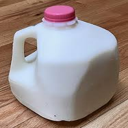

In [ ]:
resize_image=resize_image(image)
resize_image

In [ ]:
List = ["battery",'biological','brown-glass','cardboard','clothes','green-glass','metal','paper','plastic','shoes','trash','white-glass',]

In [ ]:
import numpy as np
import cv2

def resize_and_convert(input_array):
    resized_array = cv2.resize(input_array, (224, 224))

    expanded_array = np.expand_dims(resized_array, axis=0)

    return expanded_array
r_image = resize_and_convert(np.array(resized_image))

In [ ]:
r_image

array([[[[151, 114,  85],
         [148, 111,  82],
         [144, 106,  77],
         ...,
         [130,  93,  66],
         [130,  93,  66],
         [130,  93,  66]],

        [[142, 105,  76],
         [140, 103,  74],
         [136,  99,  70],
         ...,
         [129,  92,  65],
         [129,  92,  65],
         [129,  92,  65]],

        [[129,  92,  63],
         [127,  90,  61],
         [124,  88,  59],
         ...,
         [128,  91,  64],
         [128,  91,  64],
         [128,  91,  64]],

        ...,

        [[175, 137, 118],
         [170, 133, 114],
         [164, 126, 107],
         ...,
         [186, 158, 137],
         [186, 158, 137],
         [186, 158, 137]],

        [[180, 142, 123],
         [175, 137, 118],
         [168, 130, 111],
         ...,
         [189, 161, 140],
         [188, 160, 139],
         [187, 158, 137]],

        [[184, 146, 127],
         [179, 140, 122],
         [170, 132, 113],
         ...,
         [192, 164, 143],
        

In [ ]:
import tensorflow as tf
import numpy as np

# Load the quantized model
interpreter = tf.lite.Interpreter(model_path='quantized_model.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Assuming a single input tensor
input_tensor_index = input_details[0]['index']
input_tensor_shape = input_details[0]['shape']

# Load your test data
test_data = r_image

# Preprocess the input data to match the model's requirements
# Modify this based on your specific preprocessing steps for the original model
normalized_data = test_data.astype(np.float32)

# Ensure the input shape matches the model's expected input shape
assert normalized_data.shape == tuple(input_tensor_shape), "Input shape mismatch"

# Set the input tensor
interpreter.set_tensor(input_tensor_index, normalized_data)

# Run inference
interpreter.invoke()

# Get the output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])

# Output the predictions
predicted_class = np.argmax(output_data)
print(List[predicted_class])

plastic


In [ ]:
predictions = model_final.predict(r_image)

predicted_class = np.argmax(predictions[0])

print(List[predicted_class])

1/1 [==============================] - 0s 202ms/step
plastic
